6610402230 ศิริสุข ทานธรรม

# setup env

In [1]:
import pandas as pd
import numpy as np
import random
import os

seed_value=11111
random.seed(seed_value)
np.random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)

# import and clean data

In [2]:
df = pd.read_csv("CarPrice.csv")
df.dropna(axis='index', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ยี่ห้อ                501 non-null    object 
 1   ปีที่ออกขายครั้งแรก   501 non-null    object 
 2   ราคาขายมือสอง         501 non-null    object 
 3   กิโลเมตรที่ขับไปแล้ว  501 non-null    float64
 4   ประเภทเชื้อเพลิง      501 non-null    object 
 5   ประเภทผู้ขายรถ        501 non-null    object 
 6   ประเภทเกียร์          501 non-null    object 
 7   จำนวนเจ้าของรถในอดีต  501 non-null    float64
dtypes: float64(2), object(6)
memory usage: 35.2+ KB


In [3]:
df

,ยี่ห้อ,ปีที่ออกขายครั้งแรก,ราคาขายมือสอง,กิโลเมตรที่ขับไปแล้ว,ประเภทเชื้อเพลิง,ประเภทผู้ขายรถ,ประเภทเกียร์,จำนวนเจ้าของรถในอดีต
0,Suzuki,2007,60000,70000.0,เบนซิน,เจ้าของขายเอง,Manual,3.0
1,Suzuki,2007,135000,50000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
2,Hyundai Verna 1.6 SX,2012,600000,100000.0,ดีเซล,เจ้าของขายเอง,Manual,1.0
3,Mitsubishi,2017,250000,46000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
4,Honda,2014,450000,141000.0,ดีเซล,เจ้าของขายเอง,Manual,2.0
...,...,...,...,...,...,...,...,...
496,Ford,2019,700000,12586.0,เบนซิน,เต๊นท์รถ,Manual,1.0
497,Fiat,2018,650000,38083.0,ดีเซล,เต๊นท์รถ,Manual,1.0
498,Ford,2012,400000,55328.0,ดีเซล,เต๊นท์รถ,Manual,2.0
499,Ford,2012,425000,81632.0,ดีเซล,เต๊นท์รถ,Manual,1.0


# Preprocessing

In [4]:
y = np.array(df.loc[:, (df.columns == 'ราคาขายมือสอง')].astype(int))

In [5]:
categorical_columns = ['ยี่ห้อ', 'ประเภทเชื้อเพลิง', 'ประเภทผู้ขายรถ', 'ประเภทเกียร์']
numerical_columns = ['ปีที่ออกขายครั้งแรก', 'กิโลเมตรที่ขับไปแล้ว', 'จำนวนเจ้าของรถในอดีต']

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
enc = LabelEncoder()
transformed = enc.fit_transform(df[categorical_columns[0]])
transformed = transformed.reshape(-1,1)
transformed.shape

(501, 1)

In [8]:
encoders = {}
X = np.empty((df.shape[0],0))
for col in categorical_columns:
    enc = LabelEncoder()
    transformed = enc.fit_transform(df[[col]])
    X = np.hstack((X, transformed.reshape(-1,1)))
    encoders[col] = enc

print(X.shape)
for col in numerical_columns:
    X = np.hstack((X, np.array(df.loc[:, [col]])))
    
print(X.shape)
X

(501, 4)
(501, 7)


/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vecto

array([[113.0, 3.0, 0.0, ..., '2007', 70000.0, 3.0],
       [113.0, 3.0, 0.0, ..., '2007', 50000.0, 1.0],
       [46.0, 2.0, 0.0, ..., '2012', 100000.0, 1.0],
       ...,
       [4.0, 2.0, 1.0, ..., '2012', 55328.0, 2.0],
       [4.0, 2.0, 1.0, ..., '2012', 81632.0, 1.0],
       [4.0, 2.0, 1.0, ..., '2016', 155201.0, 1.0]], dtype=object)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X).astype(float)
print(X.shape)
X

(501, 7)


array([[ 0.80732271,  0.91477557, -0.48372528, ..., -1.41140393,
         0.03346169,  2.2625913 ],
       [ 0.80732271,  0.91477557, -0.48372528, ..., -1.41140393,
        -0.40420005, -0.70872781],
       [-0.61806133, -0.80816639, -0.48372528, ..., -0.23130819,
         0.68995429, -0.70872781],
       ...,
       [-1.51158565, -0.80816639,  2.0672891 , ..., -0.23130819,
        -0.28760696,  0.77693174],
       [-1.51158565, -0.80816639,  2.0672891 , ..., -0.23130819,
         0.28800575, -0.70872781],
       [-1.51158565, -0.80816639,  2.0672891 , ...,  0.71276841,
         1.89792256, -0.70872781]])

# Split data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,mean_absolute_error


k_values = range(1,101)
cv_scores = []
scorer = make_scorer(mean_absolute_error,greater_is_better=False)
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k,weights='uniform',algorithm='kd_tree',metric='minkowski',p=2)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    cv_scores.append(-scores.mean())


In [12]:
optimal_k_values = [k_values[i] for i in range(len(cv_scores)) if cv_scores[i] == min(cv_scores)]
optimal_k_values

[27]

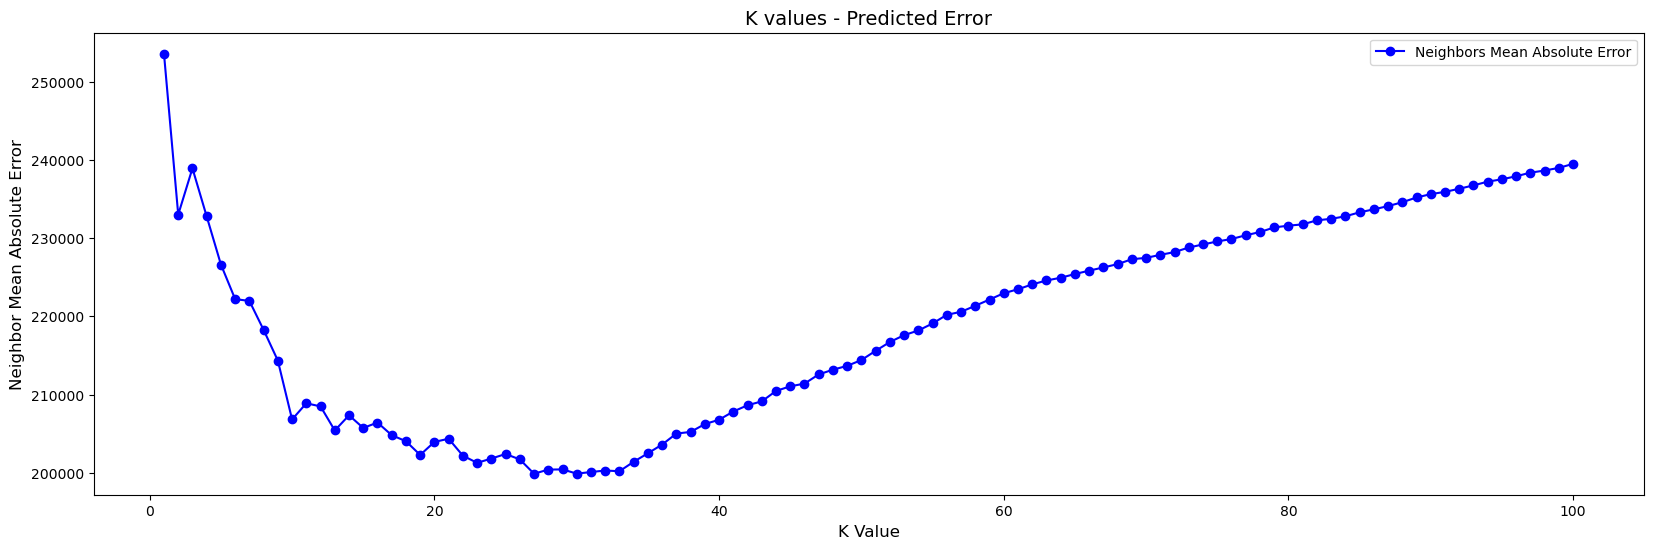

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b', label='Neighbors Mean Absolute Error')
plt.title('K values - Predicted Error', fontsize=14)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Neighbor Mean Absolute Error', fontsize=12)
plt.legend()
plt.show()

In [14]:
model = KNeighborsRegressor(n_neighbors=27,weights='distance',algorithm='kd_tree',metric='minkowski',p=2)
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=27, weights='distance')

In [15]:
from sklearn.metrics import mean_absolute_error
y_predict = model.predict(X_test)

print(
    mean_absolute_error(y_test,y_predict),
    model.score(X_test, y_test))

171143.2843852697 0.5941594917684461
